# Project 4

In [ ]:
import pandas as pd

data = pd.read_csv('./imdb_dataset.csv')
data.columns = ['index','title','title_type','genre','runtime','mpaa_rating','studio','thtr_rel_year','thtr_rel_month','thtr_rel_day','dvd_rel_year','dvd_rel_month','dvd_rel_day','imdb_rating','imdb_num_votes','critics_rating','critics_score','audience_rating','audience_score','best_pic_nom','best_pic_win','best_actor_win','best_actress_win','best_dir_win','top200_box','director','actor1','actor2','actor3','actor4','actor5','imdb_url','rt_url']
data.head()

,index,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


##1.  Clustering:

The definition of clustering is like organizing a large group of objects into smaller and much more manageable groups from the things that they might have in common. Basically you are able to find patterns or groupings in data without being told explicity what those groups may be.

###1.1 K-Means:

 In this algorithm you are basically trying to locate the center of gravity of each groups object.


In [ ]:
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

data2 = data.drop(columns=['index','title','title_type','genre','runtime','mpaa_rating','studio','thtr_rel_year','thtr_rel_month','thtr_rel_day','dvd_rel_year','dvd_rel_month','dvd_rel_day','critics_rating','audience_rating','best_pic_nom','best_pic_win','best_actor_win','best_actress_win','best_dir_win','top200_box','director','actor1','actor2','actor3','actor4','actor5','imdb_url','rt_url'], axis=1)
data2.head()

,imdb_rating,imdb_num_votes,critics_score,audience_score
0,5.5,899,45,73
1,7.3,12285,96,81
2,7.6,22381,91,91
3,7.2,35096,80,76
4,5.1,2386,33,27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

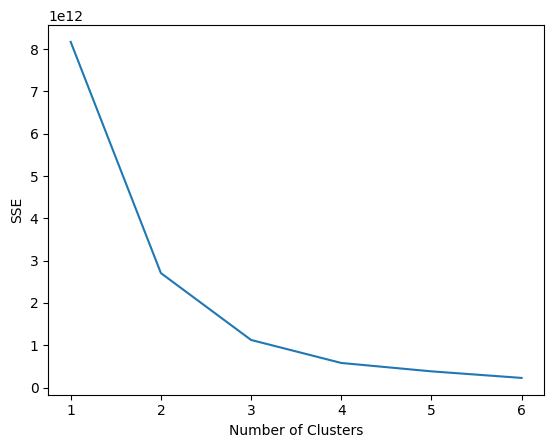

In [ ]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data2)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

With the elbow method, we determine that the optimal number of clusters is 2.

In [ ]:
k_means = cluster.KMeans(n_clusters=3, max_iter=100, random_state=15)
k_means.fit(data2)
labels = k_means.labels_
pd.DataFrame(labels, index=data.title, columns=['Cluster ID'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster ID
title,
Filly Brown,0
The Dish,0
Waiting for Guffman,0
The Age of Innocence,0
Malevolence,0
...,...
Death Defying Acts,0
Half Baked,0
Dance of the Dead,0


In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data2.columns)

,imdb_rating,imdb_num_votes,critics_score,audience_score
0,6.366312,23720.789007,55.349291,60.205674
1,7.160811,209742.581081,70.270270,74.162162
2,8.192308,658038.153846,87.538462,88.769231


###1.2 Hierarchical:

The definition of this method of clustering is that it is a method of grouping similar objects into a cluster in a hierarchal way. It holds similarities by looking liek a family tree. From here you are able to take your data and start making groups. As they grow they just look as if they are large families which could become bigger depending on how closely related they are. In this method of clustering you dont need to specify the number of questions earlier. This clustering is able to build a tree of clusters.

####1.2.1 Single:

This is the distance between two clusters is defined as the shortest distance of any two points in the two clusters.

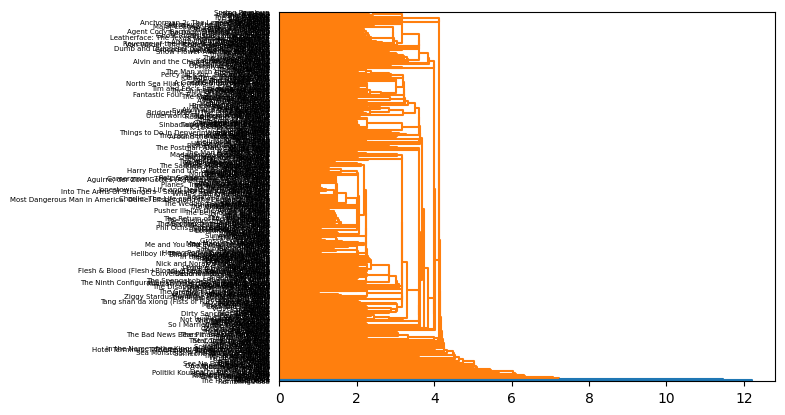

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

data2 = data
min_val = data2['imdb_num_votes'].min()
max_val = data2['imdb_num_votes'].max()
data2['normalized_imdb_num_votes'] = (data2['imdb_num_votes'] - min_val) / (max_val - min_val)

names = data2['title']
Y = data2['critics_rating']
#X = data2
X = data2.drop(['imdb_num_votes', 'index','title','title_type','genre','runtime','mpaa_rating','studio','thtr_rel_year','thtr_rel_month','thtr_rel_day','dvd_rel_year','dvd_rel_month','dvd_rel_day','critics_rating','audience_rating','best_pic_nom','best_pic_win','best_actor_win','best_actress_win','best_dir_win','top200_box','director','actor1','actor2','actor3','actor4','actor5','imdb_url','rt_url'],axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

####1.2.2 complete:

 This is the distance between two clusters is defined as the longest distance of all of the pair of points in the two clusters.

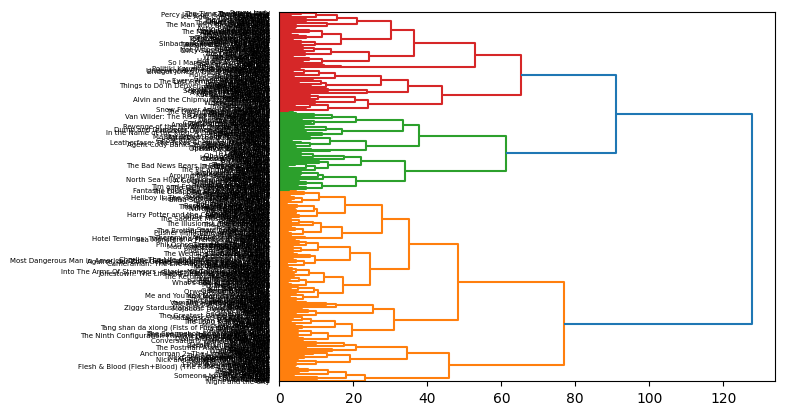

In [ ]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

####1.2.3 average:

This is the distance between all the points from both of the clusters.


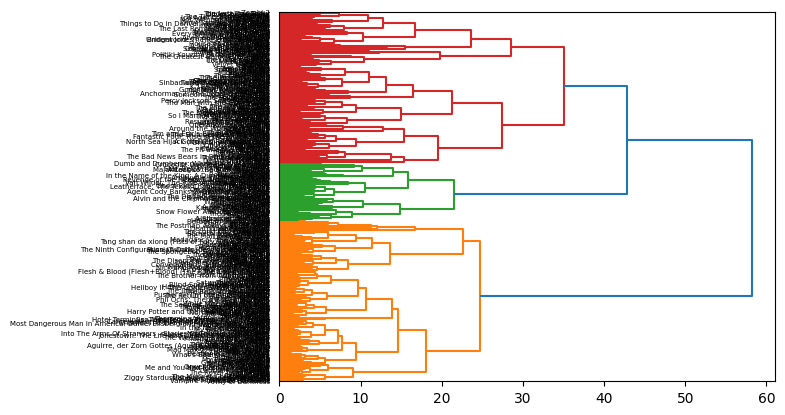

In [ ]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

##2 Text Mining

In [ ]:
# Get the text from the pdf
text = [ 'Now for manners use has company believe parlors.',
'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.',
'Principle oh explained excellent do my suspected conveying in.',
'Excellent you did therefore perfectly supposing described. ',
'Its had resolving otherwise she contented therefore.',
'Afford relied warmth out sir hearts sister use garden.',
'Men day warmth formed admire former simple.',
'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' ,
'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']

import sklearn.feature_extraction.text as sk_text

# CountVectorizer transforms the text into a usable numeric matrix
# Values below min_df are ignored, so min_df = 1 will pick up every word
count_v = sk_text.CountVectorizer(min_df = 1)

#Transform the text into a matrix
matrix = count_v.fit_transform(text)

print(type(matrix))# row matrix
print(matrix.toarray()) # this will become a array numpy
print(count_v.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0

In this next coding block, we can utilize the TFDIFVectorizer to implement a TF-IDF weighting scheme. This will convert the raw data that we have into numerical data, which is more suitable for machine learning in general

In [ ]:
#TfidfVectorizer does the same thing as CountVectorizer except it also normalizes the data set by TF-IDF
tfidf_v = sk_text.TfidfVectorizer(min_df = 1)

matrix = tfidf_v.fit_transform(text)

print(type(matrix))# row matrix
print(matrix.toarray())# this will become a array numpy
print(tfidf_v.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.36386176 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.         0.         0.36386176
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27061472 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.21

In this next coding block, we utilize TFIDVectorizer again to convert our data. What this allows us to do is to tranform the data into a matrix representation of our given weighting scheme, which is printed out below.

In [ ]:
# Do the same thing, except ignore every word that only appears once
tfidf_v = sk_text.TfidfVectorizer(min_df = 2)

matrix = tfidf_v.fit_transform(text)
print(type(matrix))

tfidf_data = matrix.toarray()

print(tfidf_data)
print(tfidf_v.get_feature_names_out())

#Term Frequency (TF) measures how often the word appears in a document
#Inverse Document Frequency (IDF) measures how "important" a word is. Low-count words in a few documents is more "important" than common words in many documents
#TF-IDF is the product of the two, giving higher weight to rare but frequent words

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.        ]
 [0.         0.75262077 0.         0.         0.         0.
  0.         0.         0.65845424 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.65845424 0.75262077]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.57735027]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        

##3 ARTIFICIAL NEURAL NETWORK (ANN)

First, start by importing dataset:

In [ ]:
import pandas as pd

data3 = pd.read_csv('./Admission.csv')
data3.columns = ['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR' ,'CGPA','Research','Chance of Admit']
data3.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Then, using zscores, normalize the numerical columns:

In [ ]:
from scipy.stats import zscore
columns_to_normalize = ['GRE Score','TOEFL Score','University Rating','SOP','LOR' ,'CGPA','Research']

for column in columns_to_normalize:
  data3[column] = zscore(data3[column])

In [ ]:
data3.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,0.92
1,2,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.76
2,3,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,0.72
3,4,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.80
4,5,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,0.65


Then drop the columns that are not needed (not helpful for prediction):

In [ ]:
data3.drop(columns=['Serial No.'], inplace=True)
data3.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,0.65


The following is a helper function that was given earlier in the course:

In [ ]:
import collections
import numpy as np
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In our problem, we are trying to predict high chance of admission vs. low chance of admission. I am considering any value above 0.8 as a high chance.

In [ ]:
data3['Admit_Class'] = pd.cut(data3['Chance of Admit'], bins=[0, 0.8, 1], labels=[0,1])

In [ ]:
data3.drop(columns=['Chance of Admit'], inplace=True)

In this step we split our X and Y

In [ ]:
X,Y = to_xy(data3,'Admit_Class')

In [ ]:
X

array([[ 1.8192376 ,  1.7788655 ,  0.77558213, ...,  1.0989443 ,
         1.7768062 ,  0.8864053 ],
       [ 0.66714835, -0.03160087,  0.77558213, ...,  1.0989443 ,
         0.48585942,  0.8864053 ],
       [-0.04182971, -0.5253644 , -0.09979273, ...,  0.01730621,
        -0.9540428 ,  0.8864053 ],
       ...,
       [ 1.1988819 ,  2.108041  ,  1.650957  , ...,  1.6397634 ,
         1.6278509 ,  0.8864053 ],
       [-0.3963187 , -0.68995225,  0.77558213, ...,  1.6397634 ,
        -0.242367  , -1.1281521 ],
       [ 0.9330151 ,  0.95592624,  0.77558213, ...,  1.0989443 ,
         0.76721966, -1.1281521 ]], dtype=float32)

In [ ]:
Y

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

Now we do our train and test split. We are choosing 0.25 as my test size.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In this step I define the ANN model. It has three layers with 20,10, and 1 neurons; first two layers use relu as their activation function and since we are predicting a 0/1, our output layer is using a sigmoid activation function. Our model's loss function is "binary_crossentropy" and our metric is accuracy. In order to achieve the best results, we are using two callbacks: monitor, and checkpointer. Monitor ensures that we are not overfitting, and checkpointer ensures that we keep the best model. Since we are using a monitor (early stopping) we set the number of epochs to a large number (1000) to make sure that training stops at the right point (in this case about 50 epochs). I am running this training 5 times and we keep the best model in our modelcheckpointer.   

In [ ]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="./ann/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
  print(i)
  model = Sequential()
  model.add(Dense(20, input_dim = X_train.shape[1], activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
  model.fit(X_train,y_train, validation_data=(X_test, y_test), verbose=1, callbacks=[monitor, checkpointer], epochs=1000)
print('Training finished...Loading the best model')
print()
model.load_weights('./ann/best_weights.hdf5') # load weights from best model
model.summary()

0
Epoch 1/1000
12/12 [==============================] - 1s 31ms/step - loss: 0.6525 - accuracy: 0.5627 - val_loss: 0.6447 - val_accuracy: 0.6000
Epoch 2/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.5761 - accuracy: 0.7493 - val_loss: 0.5601 - val_accuracy: 0.8000
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5083 - accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 0s 11ms/step - loss: 0.5119 - accuracy: 0.8293 - val_loss: 0.4853 - val_accuracy: 0.8640
Epoch 4/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.4526 - accuracy: 0.8720 - val_loss: 0.4210 - val_accuracy: 0.8960
Epoch 5/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.4030 - accuracy: 0.8827 - val_loss: 0.3637 - val_accuracy: 0.9040
Epoch 6/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.3596 - accuracy: 0.8907 - val_loss: 0.3158 - val_accuracy: 0.9040
Epoch 7/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.3258 - accuracy: 0.8960 - val_loss: 0.2786 - val_accuracy: 0.9120
Epoch 8/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.2992 - accuracy: 0.8987 - val_loss: 0.2507 - val_accuracy: 0.9120
Epoch 9/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.2798 - accuracy: 0.8987 - val_loss: 0.2286 - val_accuracy: 0.9280
Epoch 10/100

In this step we make sure that our output values are all zeros and ones. And we check the distribution of the predicted values using a histogram and compare it with the actual Y. (Comparison not part of the code, but was done by team members in initial versions of the doc)

4/4 [==============================] - 0s 4ms/step


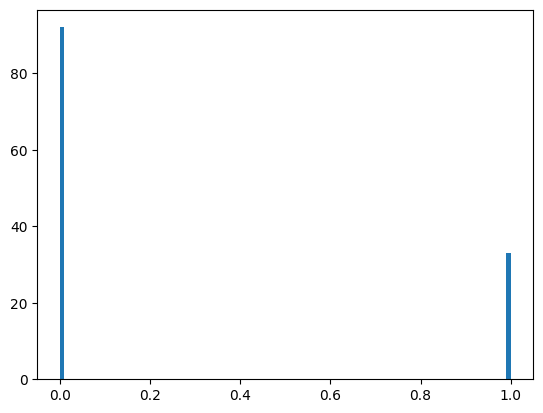

In [ ]:
pred = model.predict(X_test)
#print(pred.round())
plt.hist(pred.round(), bins=100)
plt.show()

In [ ]:
from sklearn import metrics

Finding the accuracy:

In [ ]:
print('Accuracy on test data is %.2f' % (metrics.accuracy_score(y_test, pred.round())))

Accuracy on test data is 0.96


In [ ]:
def chart_regression(pred,y,sort=True):
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by=['y'],inplace=True)
  a = plt.plot(t['pred'].tolist(),label='prediction')
  b = plt.plot(t['y'].tolist(),label='expected')
  plt.ylabel('output')
  plt.legend()
  plt.show()

Displaying the regression chart:

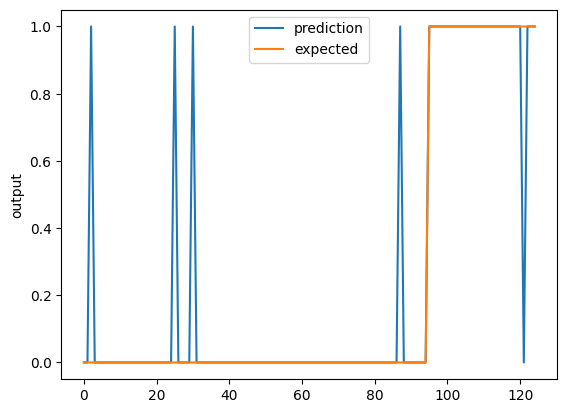

In [ ]:
%matplotlib inline
chart_regression(pred.round().flatten(), y_test)

In [ ]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plotting a confusion matrix:

[[91  4]
 [ 1 29]]


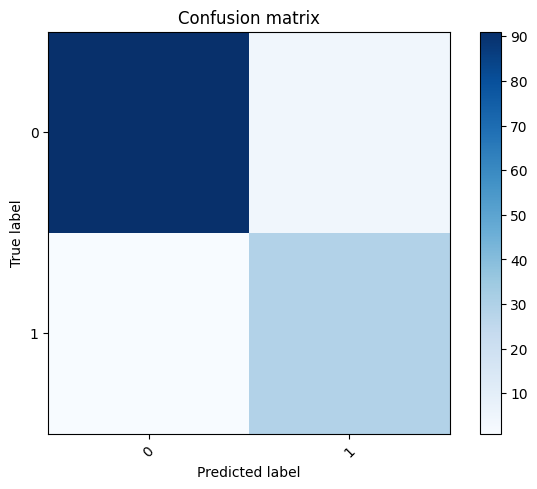

In [ ]:
confusion = metrics.confusion_matrix(y_test, pred.round())
print(confusion)

plot_confusion_matrix(confusion, [0,1], title='Confusion matrix', cmap=plt.cm.Blues)